# クラスター分析の基本

## ライブラリのインポート

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# K近傍法を行うために必要なKMeansモジュールをインポートします
#from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

## データの読み込み

In [7]:
# データを読み込みます
data = pd.read_csv('3.01. Country clusters.csv')

In [8]:
# データの中身の確認
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## データのプロット

<function matplotlib.pyplot.show(close=None, block=None)>

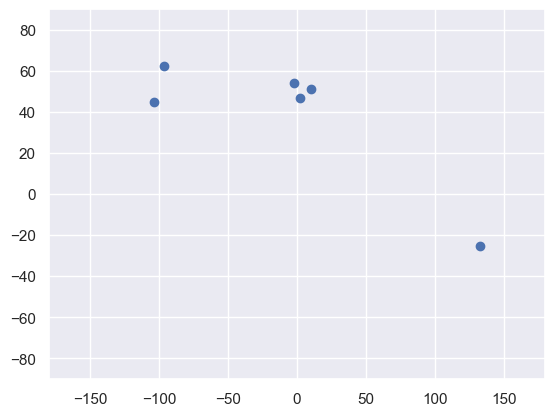

In [10]:
# longitude と latitudeの情報を使って散布図を作成します
#plt.scatter(data['Longitude'],data['Latitude'])
plt.scatter(data['Longitude'],data['Latitude'])
# グラフの範囲を設定します
#plt.xlim(-180,180)
plt.xlim(-180,180)
#plt.ylim(-90,90)
plt.ylim(-90,90)
plt.show

## 特徴量の選択

In [14]:
# ilocを使って緯度と経度の情報を切り取っていきます
#x = data.iloc[:,1:3]
x = data.iloc[:,1:3]

In [13]:
# 中身の確認
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [12]:
type(x)

pandas.core.frame.DataFrame

## クラスタリング

In [18]:
# クラスターの数を指定した上で、クラスからオブジェクトを作成
#kmeans = KMeans(3)
kmeans = KMeans(3)

In [20]:
# 入力データをモデルにフィットさせます
#kmeans.fit(x)
kmeans.fit(x)

/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

## クラスタリングの結果

In [24]:
# 予測されたクラスターの情報を含む変数を作成します
#identified_clusters = kmeans.fit_predict(x)
identified_clusters = kmeans.fit_predict(x)
# 結果の確認
#identified_clusters
identified_clusters

/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 0, 0, 0, 2], dtype=int32)

In [27]:
# データのコピーを作成します
#data_with_clusters = data.copy()
data_with_clusters = data.copy()
# クラスターの情報を追加します
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters['Cluster'] = identified_clusters
# 結果の確認
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


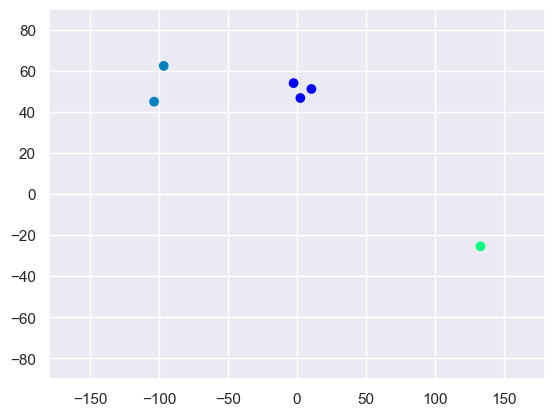

In [39]:
# 経度と緯度の情報をもとに散布図を作成します
#plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='winter')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()